## Criando DataFrame com nomes

In [2]:
import pandas as pd

In [3]:
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')

display(nomes_f.head(10), nomes_m.head(10))
print('A quantidade de nomes por sexo é de: ' + str(len(nomes_f)))

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
5,JULIANA,0,562589,6,F
6,MARCIA,0,551855,7,F
7,FERNANDA,0,531607,8,F
8,PATRICIA,0,529446,9,F
9,ALINE,0,509869,10,F


,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
5,PAULO,0,1417907,6,M
6,PEDRO,0,1213557,7,M
7,LUCAS,0,1116818,8,M
8,LUIZ,0,1102927,9,M
9,MARCOS,0,1101126,10,M


A quantidade de nomes por sexo é de: 200


In [4]:
frames = [nomes_f['nome'],nomes_m['nome']]
nomes = pd.DataFrame(pd.concat(frames))
nomes.sample(5)

,nome
29,TIAGO
194,ODAIR
183,IRACI
17,FELIPE
110,IVAN


## Organizando a lista de forma psêudoaleatória e Incluindo o ID dos alunos

In [5]:
import numpy as np

In [6]:
np.random.seed(123)

In [7]:
total_alunos = len(nomes)
total_alunos

400

In [8]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [9]:
nomes

,nome,id_aluno
0,MARIA,235
1,ANA,43
2,FRANCISCA,304
3,ANTONIA,156
4,ADRIANA,343
...,...,...
195,WALTER,231
196,ARLINDO,99
197,MICHAEL,323
198,ALVARO,383


In [10]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']

In [11]:
nomes['dominio'] = np.random.choice(dominios, total_alunos)
nomes['email'] = nomes['nome'].str.cat(nomes['dominio']).str.lower()
nomes

,nome,id_aluno,dominio,email
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com
...,...,...,...,...
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br
198,ALVARO,383,@servicodoemail.com,alvaro@servicodoemail.com


## Criando a tabela 'Cursos'

In [12]:
!pip3 install html5lib
!pip3 install lxml

In [13]:
import html5lib 

In [14]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [15]:
type(cursos)

list

In [16]:
cursos = cursos[0]

In [17]:
type(cursos)

pandas.core.frame.DataFrame

In [18]:
cursos.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


## Alterando o index de cursos

In [19]:
cursos = cursos.rename(columns={'Nome do curso':'nome_do_curso'})
cursos

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [20]:
cursos['id'] = cursos.index + 1
cursos = cursos.set_index('id')
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


## Matriculando os alunos nos cursos

In [21]:
nomes.sample(5)

,nome,id_aluno,dominio,email
46,FABIANA,358,@servicodoemail.com,fabiana@servicodoemail.com
38,DIEGO,294,@dominiodoemail.com.br,diego@dominiodoemail.com.br
136,NILTON,271,@dominiodoemail.com.br,nilton@dominiodoemail.com.br
119,MOISES,4,@servicodoemail.com,moises@servicodoemail.com
101,GISELE,298,@servicodoemail.com,gisele@servicodoemail.com


In [22]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos)).astype(int)

In [23]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
153,CAUA,77,@servicodoemail.com,caua@servicodoemail.com,1
36,DEBORA,338,@dominiodoemail.com.br,debora@dominiodoemail.com.br,1
135,ROSILENE,387,@servicodoemail.com,rosilene@servicodoemail.com,1
176,CELIO,388,@servicodoemail.com,celio@servicodoemail.com,2
144,VINICIOS,147,@servicodoemail.com,vinicios@servicodoemail.com,1


In [24]:
nomes.matriculas.describe()

count    400.000000
mean       1.517500
std        0.939095
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        7.000000
Name: matriculas, dtype: float64

In [25]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


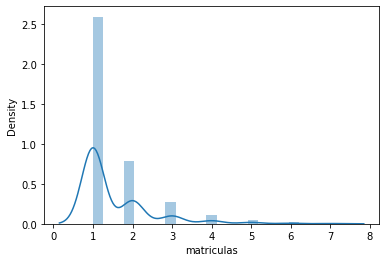

In [26]:
sns.distplot(nomes.matriculas)

In [27]:
nomes.matriculas.value_counts()

1    271
2     82
3     28
4     11
5      5
6      2
7      1
Name: matriculas, dtype: int64

In [28]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
194,CLARA,277,@servicodoemail.com,clara@servicodoemail.com,1
64,ROBSON,290,@servicodoemail.com,robson@servicodoemail.com,1
13,DANIEL,195,@servicodoemail.com,daniel@servicodoemail.com,1
98,GILSON,134,@dominiodoemail.com.br,gilson@dominiodoemail.com.br,2
33,NATALIA,192,@dominiodoemail.com.br,natalia@dominiodoemail.com.br,1


## Selecionando cursos

In [29]:
nomes.sample(6)

,nome,id_aluno,dominio,email,matriculas
23,FERNANDO,321,@dominiodoemail.com.br,fernando@dominiodoemail.com.br,1
169,JOELMA,394,@dominiodoemail.com.br,joelma@dominiodoemail.com.br,1
148,APARECIDO,332,@dominiodoemail.com.br,aparecido@dominiodoemail.com.br,1
24,CLAUDIA,16,@dominiodoemail.com.br,claudia@dominiodoemail.com.br,1
105,MILENA,371,@dominiodoemail.com.br,milena@dominiodoemail.com.br,2
90,FABIANO,365,@servicodoemail.com,fabiano@servicodoemail.com,1


In [30]:
todas_matriculas = []
x = np.random.rand(20)
prob = x/ sum(x)

In [31]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p=prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns=['id_aluno','id_curso'])

In [32]:
matriculas.head()

,id_aluno,id_curso
0,235,7
1,43,18
2,43,7
3,43,18
4,304,17


In [33]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,2,Lógica de programação
2,5,Java para Web
3,13,C# para Web
4,15,Ruby on Rails
5,15,Cursos de Python
6,49,PHP com MySql
7,48,.NET para web
8,35,Novas integrações com Java
9,36,TDD com Java


In [34]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
124,LAIS,280,@dominiodoemail.com.br,lais@dominiodoemail.com.br,2
122,ADAO,234,@dominiodoemail.com.br,adao@dominiodoemail.com.br,1
10,SANDRA,174,@dominiodoemail.com.br,sandra@dominiodoemail.com.br,1


In [35]:
cursos.head(5)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [36]:
matriculas.head(5)

,id_aluno,id_curso
0,235,7
1,43,18
2,43,7
3,43,18
4,304,17


In [37]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [38]:
matriculas_por_curso.head(5)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,2,Lógica de programação
2,5,Java para Web
3,13,C# para Web
4,15,Ruby on Rails
5,15,Cursos de Python


## Saída em diferentes formatos

In [39]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,2,Lógica de programação
2,5,Java para Web
3,13,C# para Web


In [40]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [41]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,2,Lógica de programação
1,5,Java para Web
2,13,C# para Web
3,15,Ruby on Rails
4,15,Cursos de Python
5,49,PHP com MySql
6,48,.NET para web
7,35,Novas integrações com Java
8,36,TDD com Java
9,17,Código limpo com C#


In [42]:
matriculas_json = matriculas_por_curso.to_json()

In [43]:
matriculas_json

'{"quantidade_de_alunos":{"1":2,"2":5,"3":13,"4":15,"5":15,"6":49,"7":48,"8":35,"9":36,"10":17,"11":14,"12":34,"13":69,"14":57,"15":47,"16":49,"17":6,"18":66,"19":12,"20":18},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [44]:
matriculas_html = matriculas_por_curso.to_html()

In [45]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>2</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>5</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>13</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>15</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>15</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>49</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>48</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>35</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>36</td>
  

## Criando o banco SQL

In [46]:
!pip install sqlalchemy    

In [47]:
from sqlalchemy import create_engine, MetaData, Table

In [48]:
engine = create_engine('sqlite:///:memory:')

In [49]:
engine

Engine(sqlite:///:memory:)

In [50]:
type(engine)

sqlalchemy.engine.base.Engine

## Salvando e visualizando

In [51]:
matriculas_por_curso.to_sql('matriculas',engine)

In [52]:
print(engine.table_names())

['matriculas']


## Buscando do banco SQL

In [53]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [54]:
pd.read_sql(query, engine).head(5)

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,2,Lógica de programação
1,2,5,Java para Web
2,3,13,C# para Web
3,4,15,Ruby on Rails
4,5,15,Cursos de Python


In [55]:
muitas_matriculas = pd.read_sql_table('matriculas',engine,columns=['nome_do_curso','quantidade_de_alunos'])
muitas_matriculas.head(5)

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,2
1,Java para Web,5
2,C# para Web,13
3,Ruby on Rails,15
4,Cursos de Python,15


In [56]:
muitas_matriculas2 = muitas_matriculas.query('quantidade_de_alunos > 60')
muitas_matriculas2

,nome_do_curso,quantidade_de_alunos
12,Persistência com .NET,69
17,Programação funcional,66


## Escrevendo no banco

In [57]:
muitas_matriculas2.to_sql('muitas_matriculas', con=engine)

In [58]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


## Nomes dos alunos e alunas da próxima turma

In [59]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,2,Lógica de programação
2,5,Java para Web
3,13,C# para Web
4,15,Ruby on Rails
5,15,Cursos de Python
6,49,PHP com MySql
7,48,.NET para web
8,35,Novas integrações com Java
9,36,TDD com Java


In [60]:
matriculas

,id_aluno,id_curso
0,235,7
1,43,18
2,43,7
3,43,18
4,304,17
...,...,...
602,231,15
603,99,12
604,323,16
605,383,12


In [65]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma.head(10)

,id_aluno,id_curso
6,304,16
12,288,16
36,173,16
37,16,16
49,103,16
51,192,16
66,268,16
69,259,16
76,241,16
98,21,16


In [67]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
147,ALISSON,315,@servicodoemail.com,alisson@servicodoemail.com,1
102,HELIO,117,@servicodoemail.com,helio@servicodoemail.com,1
11,CAMILA,218,@servicodoemail.com,camila@servicodoemail.com,1


In [71]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno')).head(5)

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
5,16,SEVERINA,@servicodoemail.com,severina@servicodoemail.com,1
16,16,CLAUDIA,@dominiodoemail.com.br,claudia@dominiodoemail.com.br,1
21,16,BIANCA,@dominiodoemail.com.br,bianca@dominiodoemail.com.br,2
28,16,REINALDO,@servicodoemail.com,reinaldo@servicodoemail.com,1
33,16,CHARLES,@dominiodoemail.com.br,charles@dominiodoemail.com.br,1


In [73]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].head(5)

id_aluno
5     SEVERINA
16     CLAUDIA
21      BIANCA
28    REINALDO
33     CHARLES
Name: nome, dtype: object

In [76]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame().head(5)

,nome
id_aluno,
5,SEVERINA
16,CLAUDIA
21,BIANCA
28,REINALDO
33,CHARLES


In [77]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [78]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [79]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()
proxima_turma.head(5)

,nome
id_aluno,
5,SEVERINA
16,CLAUDIA
21,BIANCA
28,REINALDO
33,CHARLES


In [90]:
proxima_turma = proxima_turma.rename(columns={'nome':'Alunos do curso de {}'.format(nome_curso)})
proxima_turma.sample(5)

,Alunos do curso de Estatística básica
id_aluno,
178,JOSIANE
120,JONAS
108,LUIZA
178,JOSIANE
16,CLAUDIA


## Excel

In [91]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)

In [92]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,SEVERINA
1,CLAUDIA
2,BIANCA
3,REINALDO
4,CHARLES
5,WILSON
6,DOUGLAS
7,ALISON
8,NATANAEL
9,JEAN
